In [12]:
from IPython.core.display import clear_output

!pip install -r requirements.txt

clear_output()

## Run the program

This notebook utilizes several variables to customize its functionality according to your preferences and requirements. Below is a brief explanation of each variable along with the available options:

1. **`pairs_alg`**: This variable determines the method used for analyzing pairs of assets. You have the following options:
   - `COINT`: Cointegration method
   - `DIST`: Distance method

2. **`trading_alg`**: Selects the trading algorithm to be employed. You can choose from:
   - `TH`: Threshold baseline algorithm
   - `FA`: Forecasting algorithm

3. **`index`**: Specifies the index to be used for analysis. Options include:
   - `s&p500`: Standard & Poor's 500 index

4. **`sector`**: Specifies the sector(s) of assets to include in the analysis. Options are:
   - `All`: Includes every sector
   - Specific sectors:
     - `Industrials`
     - `Healthcare`
     - `Technology`
     - `Consumer Cyclical`
     - `Financial Services`
     - `Consumer Defensive`
     - `Utilities`
     - `Real Estate`
     - `Energy`
     - `Basic Materials`
     - `Communication Services`

5. **`start_date`** and **`end_date`**: Define the start and end dates for the analysis period. The dates should be specified in the format `(year, month, day)`.

6. **`months_trading`**: Specifies the number of months used for trading.

7. **`months_forming`**: Indicates the number of months used for forming trading strategies.

In [14]:
# Set variables
pairs_alg='COINT'
trading_alg='TH' 
index="s&p500" 
sector="All"
start_date=(2001,1,1)
end_date=(2023,1,1)
months_trading = 12
months_forming = 60


Function specific arguments can be changed in file args.jason.

Models available are:

1. **`FA`**: forecasting models:
   - `lightgbm`: Light Gradient Boosting Machine
   - `arima`: Autoregressive Integrated Moving Average

2. **`TRADING`**: the `weights` in this function defines the portfolio distribution options:
   - `ga`: Genetic Algorithm
   - `u`: Uniform Portfolio

Default Arguments are:
```json
{
    "DIST": {
        "pair_number": 10
    },
    "COINT": {
        "pvalue_threshold": 0.01,
        "hurst_threshold": 0.5
    },
    "GA": {
        "gen": 1000,
        "pop": 100,
        "cv": 0.7,
        "mt": 0.1,
        "percentage": 0.1
    },
    "TH": {
        "entry_l": -2,
        "entry_s": 2,
        "close_l": 0,
        "close_s": 0,
        "window": 21
    },
    "FA": {
        "batch": 1,
        "model": [
            "lightgbm"
        ],
        "horizon": 5
    },
    "TRADING": {
        "transaction_cost": 0.05,
        "weights": "ga"
    }
}

In [15]:
from utils.utils import change_args,default_args

# Change to default parameters
default_args()

# Change portfolio optimization to uniform
change_args("TRADING","weights",'u')

In [16]:

from utils.utils import run

# Run the program with specified variables
run(
    pairs_alg=pairs_alg,
    trading_alg=trading_alg,
    index=index,
    sector=sector,
    start_date=start_date,
    end_date=end_date,
    months_trading=months_trading,
    months_forming=months_forming
)

Completed successfully.



In [17]:
from utils.utils import open_pickle

# Open obtained portfolio with specified variables
portfolio = open_pickle(
    pairs_alg=pairs_alg,
    trading_alg=trading_alg,
    index=index,
    sector=sector,
    start_date=start_date,
    end_date=end_date,
    months_trading=months_trading,
    months_forming=months_forming
)

**Portfolio's performance results per annum and average statistics.**

In [20]:
if portfolio is not None:
    portfolio.performance()

[{'2006-01-01/2007-01-01': {'roi': 4.896334250467782,
                            'mdd': 0.8781253493941741,
                            'sr': 0.06931973789037191,
                            'median_ret': 0.021819844345649653,
                            'mean_ret': 0.01924163190388999,
                            'max_ret': 0.5102162312335068,
                            'min_ret': -0.5103629010289268,
                            'kurtosis': 0.9248050345545988,
                            'skewness': -0.0641384128916841,
                            'volatility': 0.024476085546674863},
  '2007-01-01/2008-01-01': {'roi': 3.019273949978074,
                            'mdd': 1.5602206667050458,
                            'sr': -0.5262591817362725,
                            'median_ret': 0.013301680540755978,
                            'mean_ret': 0.012026390609289629,
                            'max_ret': 1.087113676416518,
                            'min_ret': -0.4749419124417731

**Portfolio's details per annum for pair formation and trading model.**

In [21]:
if portfolio is not None:
    portfolio.print()

[{'model': 'TH',
  'portfolio_start': 1,
  'portfolio_end': 1.0489633425046823,
  'portfolio_value': [...],
  'trading_start': '2006-01-01',
  'trading_end': '2007-01-01',
  'weights': [...],
  'cash': [...],
  'n_pairs': 174,
  'profit_pairs': 106,
  'loss_pairs': 68,
  'profit_trades': 1029,
  'loss_trades': 518,
  'non_convergent_pairs': 88}]
[{'model': 'TH',
  'portfolio_start': 1.0489633425046823,
  'portfolio_end': 1.0806344194497446,
  'portfolio_value': [...],
  'trading_start': '2007-01-01',
  'trading_end': '2008-01-01',
  'weights': [...],
  'cash': [...],
  'n_pairs': 163,
  'profit_pairs': 92,
  'loss_pairs': 71,
  'profit_trades': 950,
  'loss_trades': 512,
  'non_convergent_pairs': 59}]
[{'model': 'TH',
  'portfolio_start': 1.0806344194497446,
  'portfolio_end': 1.256592842511691,
  'portfolio_value': [...],
  'trading_start': '2008-01-01',
  'trading_end': '2009-01-01',
  'weights': [...],
  'cash': [...],
  'n_pairs': 145,
  'profit_pairs': 108,
  'loss_pairs': 37,
  '

**Portfolio's sector distribution.**

{'Industrials': 451, 'Healthcare': 299, 'Technology': 289, 'Consumer Cyclical': 366, 'Financial Services': 665, 'Consumer Defensive': 190, 'Utilities': 142, 'Real Estate': 65, 'Energy': 47, 'Basic Materials': 28, 'Communication Services': 20}


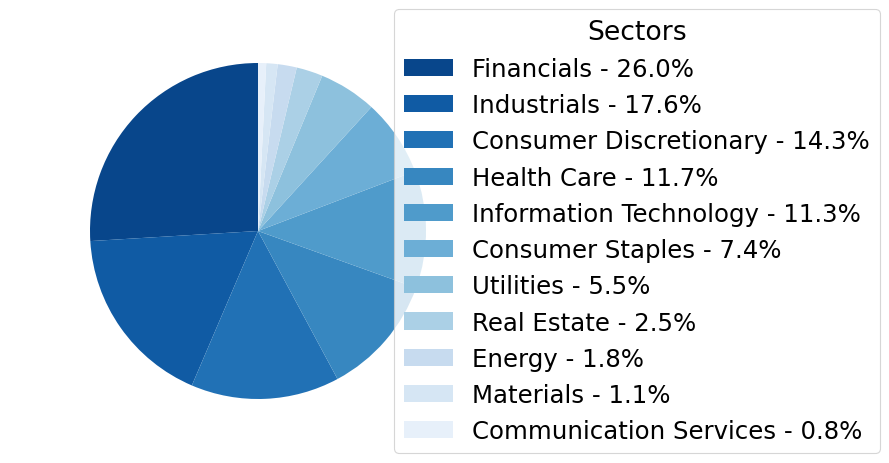

In [22]:
if portfolio is not None:
    portfolio.plot_sector_representation()

# Compare portfolios

Get portfolios for each horizon up to 5

In [18]:
portfolio_fa=[]

pairs_alg='COINT'
trading_alg='FA'
index="s&p500"
sector="All"
start_date=(2001,1,1)
end_date=(2023,1,1)
months_trading = 12
months_forming = 60

horizon=5

change_args("TRADING","weights",'ga')
change_args("GA","percentage",0.1)
change_args("FA","model",["lightgbm"])

for h in range(horizon):
    
    change_args("FA","horizon",h+1)

    run(
        pairs_alg=pairs_alg,
        trading_alg=trading_alg,
        index=index,
        sector=sector,
        start_date=start_date,
        end_date=end_date,
        months_trading=months_trading,
        months_forming=months_forming
    )

    portfolio_fa.append(
            open_pickle(
            pairs_alg=pairs_alg,
            trading_alg=trading_alg,
            index=index,
            sector=sector,
            start_date=start_date,
            end_date=end_date,
            months_trading=months_trading,
            months_forming=months_forming
        )
    )


Completed successfully.

Completed successfully.

Completed successfully.

Completed successfully.

Completed successfully.



Example of comparison between portfolios obtained.

Download S&P 500 price history.

In [24]:
import yfinance as yf
from datetime import datetime

# Download S&P 500 data
sp500 = yf.download('^GSPC', start=datetime(*(2006,1,1)), end=datetime(*(2023,1,1)))['Close']

[*********************100%%**********************]  1 of 1 completed


Compare GA portfolio with best forecasting portfolio and S&P500.

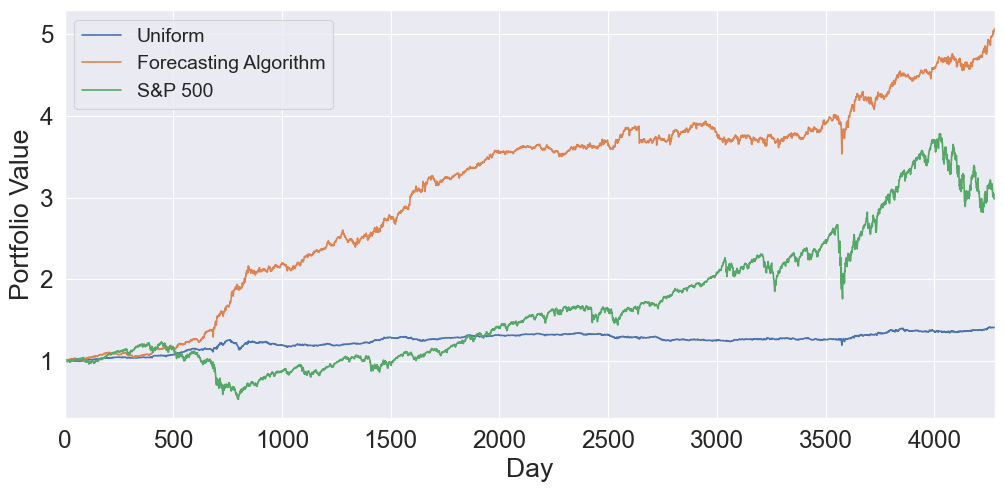

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set data and labels
datasets = [portfolio,portfolio_fa[3],sp500]
labels = ['Uniform','Forecasting Algorithm','S&P 500']

# Create a new figure with a width of 12 inches and a height of 6 inches
plt.figure(figsize=(12, 6))

plt.xlabel("Day")
plt.ylabel("Portfolio Value")

# Define the positions on the x-axis
index = range(0, len(datasets[0].total_portfolio_value))

# Create a color palette with as many colors as there are labels
colors = sns.color_palette('tab20c', len(labels))

size=len(datasets)

# Normalize portfolio value

for i,model in enumerate(labels):
        
    if model=='S&P 500':
        data=datasets[i]/datasets[i][0]
    else:
        data=datasets[i].total_portfolio_value/datasets[i].total_portfolio_value[0]

    label=labels[i]

    # Plot the data with the corresponding color
    plt.plot(index, data, label=label)
    
# Increase the size of the legend text
plt.legend(fontsize=14)
plt.subplots_adjust(bottom=0.2)

# Add a grid
plt.grid(True)

sns.set_theme()
sns.set_style("dark")

# Increase the size of the text elements
sns.set_context("paper", font_scale = 2)

plt.xlim(min(index), max(index))

plt.show()